In [19]:
from wrangle import wrangle_logs
import pandas as pd
import numpy as np


def s_wrangle():
    '''
    This function takes no arguments and prepares the curriculum log data for exploration
    to answer my half of the questions.
    '''
    student_logs = wrangle_logs()
    student_logs = student_logs[(student_logs.name != 'Staff') & (~student_logs.path.isin(['/', 'appendix', 'appendix/further-reading', 'toc']))]
    student_logs.dropna(inplace=True)
    student_logs['split_path'] = student_logs.path.str.split('/')
    student_logs['module'] = [lst[0] for lst in student_logs.split_path]
    # get sub-path for each content log
    content = student_logs[student_logs.module == 'content']
    content['cont_mod'] = [av[1] for av in content.split_path]
    # get sub-path for each appendix log
    appendix_views = content[content.module == 'appendix']
    appendix_views['ap_mod'] = [av[1] for av in appendix_views.split_path]
    # drop further-reading main page access logs
    ap_further_reading = appendix_views[(appendix_views.ap_mod == 'further-reading') & (appendix_views.path != 'appendix/further-reading')]
    # get sub-paths for each further-reading log within the appendix
    ap_further_reading['fr_mod'] = [fr[2] for fr in ap_further_reading.split_path]
    # add sub-path columns to curriculum access logs
    merged = pd.merge(student_logs, ap_further_reading[['cont_mod', 'ap_mod', 'fr_mod']], how='left', left_index=True, right_index=True)
    # combine columns
    merged['lesson'] = np.where(merged.cont_mod.isnull(), merged.module, merged.cont_mod)
    merged['lesson'] = np.where(merged.ap_mod.isnull(), merged.lesson, merged.ap_mod)
    merged['lesson'] = np.where(merged.fr_mod.isnull(), merged.lesson, merged.fr_mod)
    # drop unnecessary columns
    merged.drop(columns=['module', 'cont_mod', 'ap_mod', 'fr_mod', 'split_path'], inplace=True)
    merged = merged[~merged.lesson.isin(['appendix', 'content', 'further-reading'])]
    return merged
df = s_wrangle()
df

<ipython-input-19-cefeb68ca96e>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content['cont_mod'] = [av[1] for av in content.split_path]


,path,ip,user_id,name,program_id,start_date,end_date,program_name,lesson
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,java-ii
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,slides
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,javascript-i
2018-01-26 09:56:41,javascript-i/loops,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,javascript-i
...,...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,jquery/personal-site,136.50.98.51,869,Marco,2,2021-01-25,2021-07-19,WebDev-Java,jquery
2021-04-21 16:36:34,html-css/css-ii/bootstrap-grid-system,104.48.214.211,948,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,html-css
2021-04-21 16:37:48,java-iii,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,java-iii
2021-04-21 16:38:14,java-iii/servlets,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,java-iii


### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

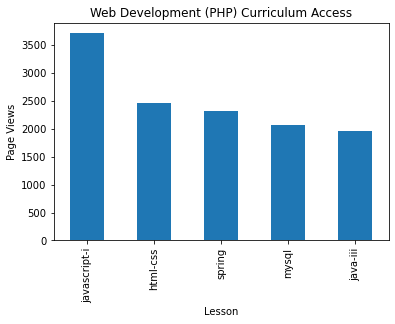

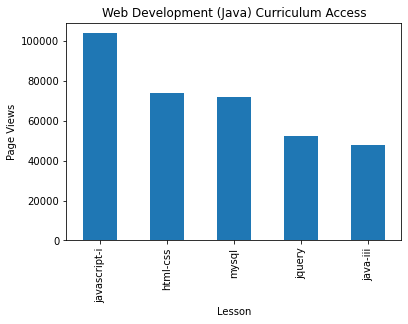

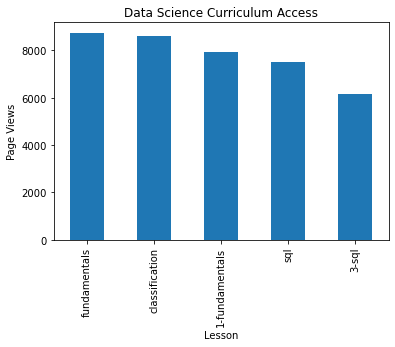

In [20]:
import matplotlib.pyplot as plt

php = df[(df.program_id == 1)]
java = df[(df.program_id == 2)]
ds = df[df.program_id == 3]

php.lesson.value_counts().head(5).plot(kind='bar').set(title='Web Development (PHP) Curriculum Access', xlabel='Lesson', ylabel='Page Views')
plt.show()
java.lesson.value_counts().head(5).plot(kind='bar').set(title='Web Development (Java) Curriculum Access', xlabel='Lesson', ylabel='Page Views')
plt.show()
ds.lesson.value_counts().head(5).plot(kind='bar').set(title='Data Science Curriculum Access', xlabel='Lesson', ylabel='Page Views')
plt.show();

For both PHP and Java Web Development students, javascript-i, html-css, mysql, and java-iii are in the top 5 most-viewed lessons. PHP students also accessed spring lessons most frequently, and Java students also accessed jquery lessons most frequently.

Data Science students accessed lessons on fundamentals, classification, and sql most frequently.

### The Web Development `javascript-i` lessons attract the most traffic across cohorts from both PHP and Java students. The Data Science lessons on `fundamentals` attract the most traffic from students in that program. It seems the foundational lessons attract the most traffic across all Codeup students.

### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [77]:
# view students accessing curriculum least during program
active = df[(df.index < df.end_date) & (df.index > df.start_date)]
active.groupby('user_id').lesson.count().sort_values().head(10)

user_id
832     2
539     3
278     3
956     3
388     7
812     7
941     9
679    10
572    11
889    12
Name: lesson, dtype: int64

<AxesSubplot:xlabel='user_id'>

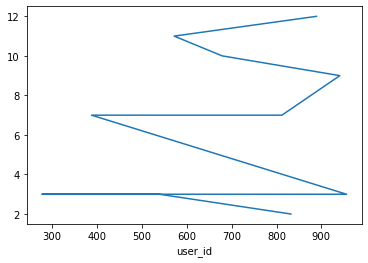

In [78]:
active.groupby('user_id').lesson.count().sort_values().head(10).plot(x=active.index)

In [55]:
df[df.user_id == 832]

,path,ip,user_id,name,program_id,start_date,end_date,program_name,lesson
2020-12-07 14:22:38,javascript-i,69.154.52.98,832,Jupiter,2,2020-09-21,2021-03-30,WebDev-Java,javascript-i
2020-12-07 14:22:39,html-css,69.154.52.98,832,Jupiter,2,2020-09-21,2021-03-30,WebDev-Java,html-css


In [56]:
df[df.user_id == 539]

,path,ip,user_id,name,program_id,start_date,end_date,program_name,lesson
2019-11-04 16:54:02,html-css,97.105.19.58,539,Europa,2,2019-11-04,2020-04-17,WebDev-Java,html-css
2019-11-04 16:54:38,html-css/introduction,97.105.19.58,539,Europa,2,2019-11-04,2020-04-17,WebDev-Java,html-css
2019-11-04 16:54:45,html-css/elements,97.105.19.58,539,Europa,2,2019-11-04,2020-04-17,WebDev-Java,html-css


In [57]:
df[df.user_id == 278]

,path,ip,user_id,name,program_id,start_date,end_date,program_name,lesson
2018-09-27 14:47:37,java-ii/arrays,107.77.217.9,278,Voyageurs,2,2018-05-29,2018-10-11,WebDev-Java,java-ii
2018-09-27 14:58:48,java-ii/arrays,107.77.217.9,278,Voyageurs,2,2018-05-29,2018-10-11,WebDev-Java,java-ii
2018-09-27 14:59:07,java-ii/collections,107.77.217.9,278,Voyageurs,2,2018-05-29,2018-10-11,WebDev-Java,java-ii
2018-10-16 18:56:02,javascript-ii,67.11.175.66,278,Voyageurs,2,2018-05-29,2018-10-11,WebDev-Java,javascript-ii
2018-10-16 18:56:22,javascript-ii/es6,67.11.175.66,278,Voyageurs,2,2018-05-29,2018-10-11,WebDev-Java,javascript-ii
...,...,...,...,...,...,...,...,...,...
2019-02-09 17:31:50,mysql/introduction,67.11.175.66,278,Voyageurs,2,2018-05-29,2018-10-11,WebDev-Java,mysql
2019-02-09 17:35:43,mysql/tables,67.11.175.66,278,Voyageurs,2,2018-05-29,2018-10-11,WebDev-Java,mysql
2019-02-09 17:37:19,mysql/basic-statements,67.11.175.66,278,Voyageurs,2,2018-05-29,2018-10-11,WebDev-Java,mysql
2019-02-09 17:58:08,mysql/tables,67.11.175.66,278,Voyageurs,2,2018-05-29,2018-10-11,WebDev-Java,mysql


In [58]:
df[df.user_id == 956]

,path,ip,user_id,name,program_id,start_date,end_date,program_name,lesson
2021-04-15 14:55:05,javascript-i/introduction/operators,162.200.114.251,956,Oberon,2,2021-04-12,2021-10-01,WebDev-Java,javascript-i
2021-04-15 14:56:04,javascript-i/introduction/primitive-types,162.200.114.251,956,Oberon,2,2021-04-12,2021-10-01,WebDev-Java,javascript-i
2021-04-15 15:32:22,javascript-i/introduction/operators,162.200.114.251,956,Oberon,2,2021-04-12,2021-10-01,WebDev-Java,javascript-i


In [59]:
df[df.user_id == 388]

,path,ip,user_id,name,program_id,start_date,end_date,program_name,lesson
2019-03-19 09:50:23,html-css,97.105.19.58,388,Andromeda,2,2019-03-18,2019-07-30,WebDev-Java,html-css
2019-03-19 09:50:28,html-css/elements,97.105.19.58,388,Andromeda,2,2019-03-18,2019-07-30,WebDev-Java,html-css
2019-03-19 10:04:11,html-css/elements,97.105.19.58,388,Andromeda,2,2019-03-18,2019-07-30,WebDev-Java,html-css
2019-03-19 10:19:32,html-css/elements,97.105.19.58,388,Andromeda,2,2019-03-18,2019-07-30,WebDev-Java,html-css
2019-03-19 11:11:51,html-css/forms,97.105.19.58,388,Andromeda,2,2019-03-18,2019-07-30,WebDev-Java,html-css
2019-03-19 11:12:02,html-css/elements,97.105.19.58,388,Andromeda,2,2019-03-18,2019-07-30,WebDev-Java,html-css
2019-03-19 12:19:23,html-css/elements,97.105.19.58,388,Andromeda,2,2019-03-18,2019-07-30,WebDev-Java,html-css


In [60]:
df[df.user_id == 812]

,path,ip,user_id,name,program_id,start_date,end_date,program_name,lesson
2020-11-08 01:45:34,html-css/css-i/selectors-and-properties,24.243.49.105,812,Hyperion,2,2020-05-26,2020-11-10,WebDev-Java,html-css
2020-11-08 01:45:41,html-css/elements,24.243.49.105,812,Hyperion,2,2020-05-26,2020-11-10,WebDev-Java,html-css
2020-11-08 01:45:56,html-css/css-i/introduction,24.243.49.105,812,Hyperion,2,2020-05-26,2020-11-10,WebDev-Java,html-css
2020-11-08 01:46:01,html-css/css-i,24.243.49.105,812,Hyperion,2,2020-05-26,2020-11-10,WebDev-Java,html-css
2020-11-08 01:46:04,html-css/forms,24.243.49.105,812,Hyperion,2,2020-05-26,2020-11-10,WebDev-Java,html-css
2020-11-08 01:46:06,html-css/elements,24.243.49.105,812,Hyperion,2,2020-05-26,2020-11-10,WebDev-Java,html-css
2020-11-08 01:46:07,html-css,24.243.49.105,812,Hyperion,2,2020-05-26,2020-11-10,WebDev-Java,html-css
2020-11-17 15:31:04,html-css/css-i/selectors-and-properties,24.243.49.105,812,Hyperion,2,2020-05-26,2020-11-10,WebDev-Java,html-css
2020-11-17 15:31:13,jquery,24.243.49.105,812,Hyperion,2,2020-05-26,2020-11-10,WebDev-Java,jquery
2020-11-17 15:31:15,javascript-i,24.243.49.105,812,Hyperion,2,2020-05-26,2020-11-10,WebDev-Java,javascript-i


In [61]:
df[df.user_id == 941]

,path,ip,user_id,name,program_id,start_date,end_date,program_name,lesson
2021-03-15 17:00:48,html-css,136.50.53.26,941,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,html-css
2021-03-15 17:00:50,jquery,136.50.53.26,941,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,jquery
2021-03-15 17:00:51,javascript-ii,136.50.53.26,941,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,javascript-ii
2021-03-15 17:00:53,mysql,136.50.53.26,941,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,mysql
2021-03-15 17:00:54,java-iii,136.50.53.26,941,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,java-iii
2021-03-15 17:00:58,java-iii/servlets,136.50.53.26,941,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,java-iii
2021-03-15 17:00:59,java-iii/servlets,136.50.53.26,941,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,java-iii
2021-03-15 17:01:02,java-iii/mvc/servlets-with-jsps,136.50.53.26,941,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,java-iii
2021-03-15 17:01:03,java-iii/user-input,136.50.53.26,941,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,java-iii


In [62]:
df[df.user_id == 679]

,path,ip,user_id,name,program_id,start_date,end_date,program_name,lesson
2020-07-13 14:39:21,13-advanced-topics/1-tidy-data,24.28.146.155,679,Darden,3,2020-07-13,2021-01-12,DataSci,13-advanced-topics
2020-07-13 14:39:36,1-fundamentals/1.1-intro-to-data-science,24.28.146.155,679,Darden,3,2020-07-13,2021-01-12,DataSci,1-fundamentals
2020-07-13 14:39:37,1-fundamentals/AI-ML-DL-timeline.jpg,24.28.146.155,679,Darden,3,2020-07-13,2021-01-12,DataSci,1-fundamentals
2020-07-13 14:39:37,1-fundamentals/modern-data-scientist.jpg,24.28.146.155,679,Darden,3,2020-07-13,2021-01-12,DataSci,1-fundamentals
2020-07-13 15:49:31,1-fundamentals/1.1-intro-to-data-science,24.28.146.155,679,Darden,3,2020-07-13,2021-01-12,DataSci,1-fundamentals
2020-07-13 15:49:32,1-fundamentals/modern-data-scientist.jpg,24.28.146.155,679,Darden,3,2020-07-13,2021-01-12,DataSci,1-fundamentals
2020-07-13 15:49:32,1-fundamentals/AI-ML-DL-timeline.jpg,24.28.146.155,679,Darden,3,2020-07-13,2021-01-12,DataSci,1-fundamentals
2020-07-14 08:05:15,1-fundamentals/1.1-intro-to-data-science,24.28.146.155,679,Darden,3,2020-07-13,2021-01-12,DataSci,1-fundamentals
2020-07-14 08:05:15,1-fundamentals/AI-ML-DL-timeline.jpg,24.28.146.155,679,Darden,3,2020-07-13,2021-01-12,DataSci,1-fundamentals
2020-07-14 08:05:15,1-fundamentals/modern-data-scientist.jpg,24.28.146.155,679,Darden,3,2020-07-13,2021-01-12,DataSci,1-fundamentals


In [63]:
df[df.user_id == 572]

,path,ip,user_id,name,program_id,start_date,end_date,program_name,lesson
2020-01-14 16:02:41,html-css,97.105.19.58,572,Fortuna,2,2020-01-13,2020-06-23,WebDev-Java,html-css
2020-01-14 16:02:54,html-css/introduction,97.105.19.58,572,Fortuna,2,2020-01-13,2020-06-23,WebDev-Java,html-css
2020-01-14 16:09:19,html-css,97.105.19.58,572,Fortuna,2,2020-01-13,2020-06-23,WebDev-Java,html-css
2020-01-14 16:09:20,javascript-i,97.105.19.58,572,Fortuna,2,2020-01-13,2020-06-23,WebDev-Java,javascript-i
2020-01-14 16:09:22,jquery,97.105.19.58,572,Fortuna,2,2020-01-13,2020-06-23,WebDev-Java,jquery
2020-01-14 16:09:23,javascript-ii,97.105.19.58,572,Fortuna,2,2020-01-13,2020-06-23,WebDev-Java,javascript-ii
2020-01-14 16:09:24,java-i,97.105.19.58,572,Fortuna,2,2020-01-13,2020-06-23,WebDev-Java,java-i
2020-01-14 16:09:25,java-ii,97.105.19.58,572,Fortuna,2,2020-01-13,2020-06-23,WebDev-Java,java-ii
2020-01-14 16:09:31,mysql,97.105.19.58,572,Fortuna,2,2020-01-13,2020-06-23,WebDev-Java,mysql
2020-01-14 16:13:21,java-iii,97.105.19.58,572,Fortuna,2,2020-01-13,2020-06-23,WebDev-Java,java-iii


In [64]:
df[df.user_id == 889]

,path,ip,user_id,name,program_id,start_date,end_date,program_name,lesson
2021-01-27 09:44:58,javascript-i,98.156.147.200,889,Marco,2,2021-01-25,2021-07-19,WebDev-Java,javascript-i
2021-01-27 09:48:01,javascript-i/introduction,98.156.147.200,889,Marco,2,2021-01-25,2021-07-19,WebDev-Java,javascript-i
2021-01-27 09:53:39,javascript-i/introduction/primitive-types,98.156.147.200,889,Marco,2,2021-01-25,2021-07-19,WebDev-Java,javascript-i
2021-01-27 09:58:25,javascript-i/introduction,98.156.147.200,889,Marco,2,2021-01-25,2021-07-19,WebDev-Java,javascript-i
2021-01-27 11:40:00,javascript-i/introduction/primitive-types,98.156.147.200,889,Marco,2,2021-01-25,2021-07-19,WebDev-Java,javascript-i
2021-01-27 11:58:04,javascript-i/introduction/operators,98.156.147.200,889,Marco,2,2021-01-25,2021-07-19,WebDev-Java,javascript-i
2021-01-28 13:28:44,javascript-i/introduction/variables,98.156.147.200,889,Marco,2,2021-01-25,2021-07-19,WebDev-Java,javascript-i
2021-01-28 13:28:53,javascript-i/introduction/working-with-data-ty...,98.156.147.200,889,Marco,2,2021-01-25,2021-07-19,WebDev-Java,javascript-i
2021-02-01 08:57:50,javascript-i/javascript-with-html,98.156.147.200,889,Marco,2,2021-01-25,2021-07-19,WebDev-Java,javascript-i
2021-02-01 09:01:27,javascript-i/introduction/working-with-data-ty...,98.156.147.200,889,Marco,2,2021-01-25,2021-07-19,WebDev-Java,javascript-i


### The students with the following `user_id`s accessed the curriculum the least often during their time as a student at Codeup: [832, 539, 278, 956, 388, 812, 941, 679, 572, 889]. With the exception of user 679 from the Darden Data Science cohort, all of these students were Java Web Development students. None of these students are in the same cohort.

In [21]:
df

,path,ip,user_id,name,program_id,start_date,end_date,program_name,lesson
2018-01-26 09:56:02,java-ii,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,java-ii
2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,java-ii
2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,Hampton,1,2015-09-22,2016-02-06,WebDev-PHP,slides
2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,javascript-i
2018-01-26 09:56:41,javascript-i/loops,97.105.19.61,2,Teddy,2,2018-01-08,2018-05-17,WebDev-Java,javascript-i
...,...,...,...,...,...,...,...,...,...
2021-04-21 16:36:09,jquery/personal-site,136.50.98.51,869,Marco,2,2021-01-25,2021-07-19,WebDev-Java,jquery
2021-04-21 16:36:34,html-css/css-ii/bootstrap-grid-system,104.48.214.211,948,Neptune,2,2021-03-15,2021-09-03,WebDev-Java,html-css
2021-04-21 16:37:48,java-iii,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,java-iii
2021-04-21 16:38:14,java-iii/servlets,67.11.50.23,834,Luna,2,2020-12-07,2021-06-08,WebDev-Java,java-iii


### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?

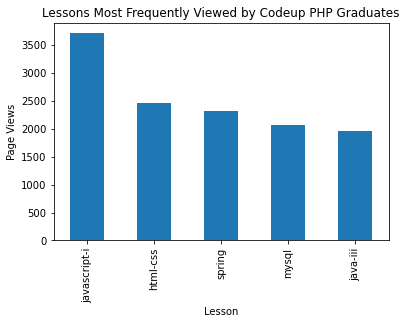

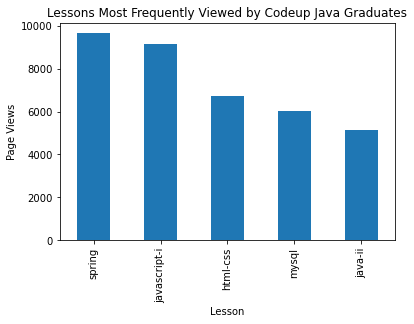

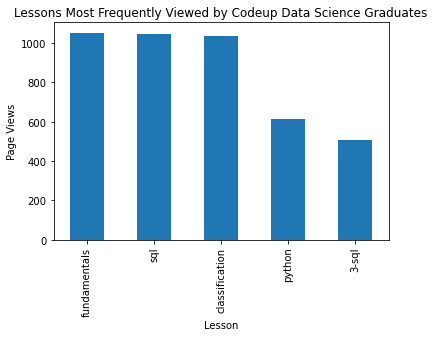

In [27]:
php[php.end_date < php.index].lesson.value_counts().head(5).plot(kind='bar')
plt.title('Lessons Most Frequently Viewed by Codeup PHP Graduates')
plt.ylabel('Page Views')
plt.xlabel('Lesson')
plt.show()
java[java.end_date < java.index].lesson.value_counts().head(5).plot(kind='bar').set(title='Lessons Most Frequently Viewed by Codeup Java Graduates', ylabel='Page Views', xlabel='Lesson')
plt.show()
ds[ds.end_date < ds.index].lesson.value_counts().head(5).plot(kind='bar').set(title='Lessons Most Frequently Viewed by Codeup Data Science Graduates', ylabel='Page Views', xlabel='Lesson');

### After their programs have ended, Codeup graduates most frequently visit lessons covering the following topics:
- Web Development (PHP): javascript-i, html-css, spring, mysql, java-iii
- Web Development (Java): spring, javascript-i, html-css, mysql, java-ii
- Data Science: sql, fundamentals, classification, python

### 7. Which lessons are least accessed?

In [69]:
pd.set_option('display.max_rows', None)

df.lesson.value_counts()

javascript-i                                      107537
html-css                                           76168
mysql                                              73741
jquery                                             54084
spring                                             49915
java-iii                                           49814
java-ii                                            48703
java-i                                             37075
javascript-ii                                      34827
search                                             16190
examples                                           13642
fundamentals                                        8792
classification                                      8622
1-fundamentals                                      8120
sql                                                 7507
slides                                              7153
3-sql                                               6183
python                         

In [38]:
df.lesson.value_counts()[(df.lesson.value_counts() < 1000) & (df.lesson.value_counts() > 20)]

12-distributed-ml            996
prework                      855
distributed-ml               659
advanced-topics              267
assets                       118
individual-project            81
git                           70
introduction                  69
capstones                     63
AI-ML-DL-timeline.jpg         58
modern-data-scientist.jpg     58
elements                      57
login                         50
1._Fundamentals               49
css-ii                        40
css-i                         39
3.0-mysql-overview            35
extra-challenges              34
Pipeline_Demo                 28
forms                         28
study-session-with-ryan       26
javascript                    25
mvc                           22
Name: lesson, dtype: int64

### The topics accessed least frequently include storytelling, time series, and lessons that are not fundamental to the curriculum. For example, pages providing extra challenges such as advanced topics and prework are not accessed very often. In addition, those lessons covering advanced machine learning topics such as NLP are accessed infrequently by current and former students.

### 8. Anything Else?
### While exploring the data and seeing which paths were accessed 